In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re

In [7]:
df = pd.read_csv('Restaurant_Reviews.tsv',sep='\t')

In [8]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [9]:
df.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [12]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
stop=stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ashis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
from wordcloud import WordCloud
positivedata = df[ df['Liked'] == 1]
positivedata =positivedata['Review']
negdata = df[df['Liked'] == 0]
negdata= negdata['Review']

Positive words are as follows


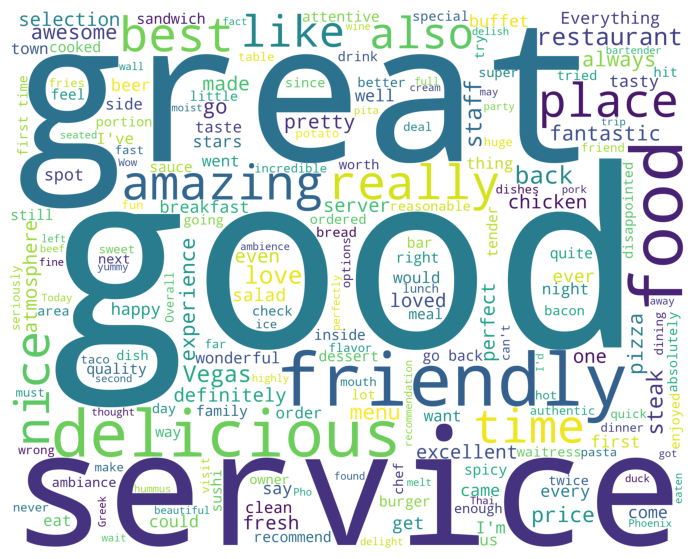

Negative words are as follows


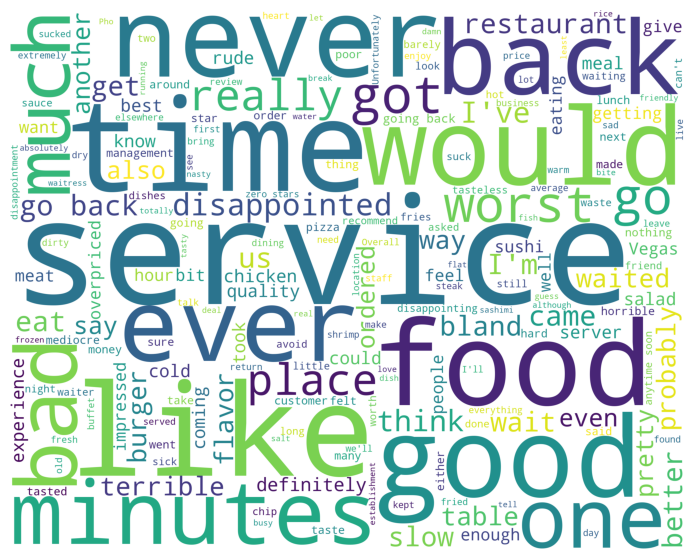

In [24]:
def wordcloud_draw(dataset, color = 'white'):
    words = ' '.join(dataset)
    cleaned_word = " ".join([word for word in words.split()
                              if(word!='food' and word!='place')
                            ])
    wordcloud = WordCloud(stopwords=stop,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(10, 7))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words are as follows")
wordcloud_draw(positivedata,'white')
print("Negative words are as follows")
wordcloud_draw(negdata)

### Create a Corpus of Cleaned Reviews. Apply the preprocessing steps

In [50]:
corpus = []
for i in range(0, 1000):
  review = re.sub('[^a-zA-Z]', ' ', df['Review'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

### Create Bag of Words Model using CountVectorizer

In [55]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:, -1].values

In [56]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [58]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [60]:
predictions = classifier.predict(X_test)

In [62]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [64]:
accuracy_score(y_test,predictions)*100

73.0

In [65]:
confusion_matrix(y_test,predictions)

array([[55, 42],
       [12, 91]], dtype=int64)